# Import Module

In [38]:
import pandas as pd
from sklearn import impute
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [2]:
# 將資料讀取
original_data = pd.read_csv("data.csv")

# 觀察前五列資料
original_data.head()

c:\users\johnny\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990/2/1
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990/2/1
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990/2/1
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990/3/1
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990/3/1


In [3]:
# 檢查資料總共幾列幾行
original_data.shape

(435742, 13)

In [4]:
# 統計每個column有多少 NULL值
original_data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
# 查看資料的基本訊息(Range:row數 & col數 , 每個col的non-null值有多少個)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [5]:
# 檢查資料【數值部分】的【統計性數值】
original_data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


# Clean Data

In [6]:
# 刪除不必要的column
original_data = original_data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'] , axis=1)

In [7]:
# 處理時間日期
original_data['date'] = pd.to_datetime(original_data['date'], format="%Y/%m/%d" , errors='coerce')

# 將時間日期為NULL的row刪除
original_data.dropna(subset=['date'])

# reset index of df
original_data = original_data.reset_index()

In [8]:
# 將【年分】獨立出來
original_data['year'] = original_data['date'].dt.year

In [9]:
# 修改資料中 type column 的 string
def TypeEdit(place):
    if(place=='Industrial Area'):
        return 'I'
    else:
        return 'RRO'
    
original_data['type'] = original_data['type'].apply(TypeEdit)

# Predict NaN Value

In [10]:
# 設定 SimpleImputer
imp = impute.SimpleImputer(missing_values=np.nan , strategy='mean')

# 將 rspm , spm , pm_2.5 變成 numpy 2d array 形式，才可以丟入 SimpleImputer 訓練
# 因此必須將 dataframe 轉成 array 才會是 2D，否則 Series 會形成 1D array
train_rspm = np.asarray(original_data[['rspm']])
train_spm = np.asarray(original_data[['spm']])
train_pm2_5 = np.asarray(original_data[['pm2_5']])

In [12]:
# 將這些 2D array 丟入 SimpleImputor 訓練
result_rspm = imp.fit_transform(train_rspm)
result_spm = imp.fit_transform(train_spm)
result_pm2_5 = imp.fit_transform(train_pm2_5)

In [27]:
# 將訓練過後的值寫回df
index1 = -1
index2 = -1
index3 = -1

def counter(c):
    c = c+1
    return c

def fill_value1(value):
    global index1
    index1 = counter(index1)
    return result_rspm[index1][0]

def fill_value2(value):
    global index2
    index2 = counter(index2)
    return result_spm[index2][0]

def fill_value3(value):
    global index3
    index3 = counter(index3)
    return result_pm2_5[index3][0]

original_data['rspm'] = original_data['rspm'].apply(fill_value1)
original_data['spm'] = original_data['spm'].apply(fill_value2)
original_data['pm2_5'] = original_data['pm2_5'].apply(fill_value3)

# Present Data

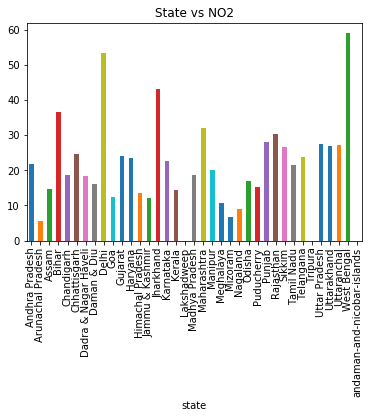

In [64]:
# original_data_state_NO2 為 dataframe([[]])，index為數字
original_data_state_NO2 = original_data[['state','no2']]

# original_data_state_NO2 為 dataframe，index為state
original_data_state_NO2 = original_data_state_NO2.groupby('state').mean()

# original_data_state_NO2['no2'] 為 Series([])，index為state
original_data_state_NO2['no2'].plot.bar()
plt.title('State vs NO2')
plt.show()

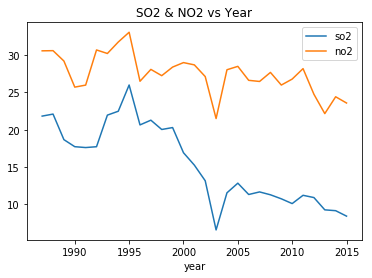

In [73]:
original_data_year_so2_no2 = original_data[['year','so2','no2']]
original_data_year_so2_no2 = original_data_year_so2_no2.groupby('year').mean()
original_data_year_so2_no2['so2'].plot.line()
original_data_year_so2_no2['no2'].plot.line()
plt.legend(loc='upper right')
plt.title('SO2 & NO2 vs Year')
plt.show()